In [1]:
import Bio
from Bio import SeqIO
import matplotlib.pyplot as plt

# GC-content diagram

### What is GC-content?


"In molecular biology and genetics, GC-content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C). This measure indicates the proportion of G and C bases out of an implied four total bases, also including adenine and thymine in DNA and adenine and uracil in RNA."

~ https://en.wikipedia.org/wiki/GC-content


### What is the aim of this visualization? 

To show how dense is this content near a given point in a genome.

### Paramenters
* window_size
* step_size

# Implementation

In [2]:
def cg_content(seq):
    """
    CG-content of a sequence
    
    Args:
    * seq: Seq - sequence;
    
    Returns:
    * CG-content: float - given by: #{x: x in seq and (x == G or x == C)}/length(seq)
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [3]:
def plot_cg_content(seq, window_size=int(1e6), step_size=int(1e3)):
    """
    CG-content diagram
    
    Args:
    * seq: Seq - sequence;
    * window_size: int - size of a window, 1e6 by default;
    * step_size: int - size of a step, 1e3 by default;
    
    The function plots a CG-content diagram, i.e. percentage of guanine (G) or cytosine (C) inside a window at a given point in the sequence (seq).
    """
    # Plot
    fig = plt.figure(dpi=200)
    plt.plot(
        range(window_size//2, len(seq)-window_size//2, step_size),
        [100*cg_content(seq[i:i+window_size]) for i in range(0, len(seq)-window_size, step_size)]
    )
    plt.title("CG-content")
    plt.legend([f"CG-content: Window Size: {window_size}, Step Size: {step_size}"])
    plt.xlabel("Position in the Sequence")
    plt.ylabel("CG-content")
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

# Test

### Parsing

In [5]:
parsed = list(SeqIO.parse('../../data/fasta_test.fa', 'fasta'))[0]

### Sequence Data

In [6]:
parsed.seq

Seq('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG...TTC')

In [7]:
parsed.id

'Chromosome'

In [8]:
parsed.name

'Chromosome'

In [9]:
parsed.description

'Chromosome dna:chromosome chromosome:ASM584v2:Chromosome:1:4641652:1 REF'

In [10]:
parsed.dbxrefs

[]

### Visualization

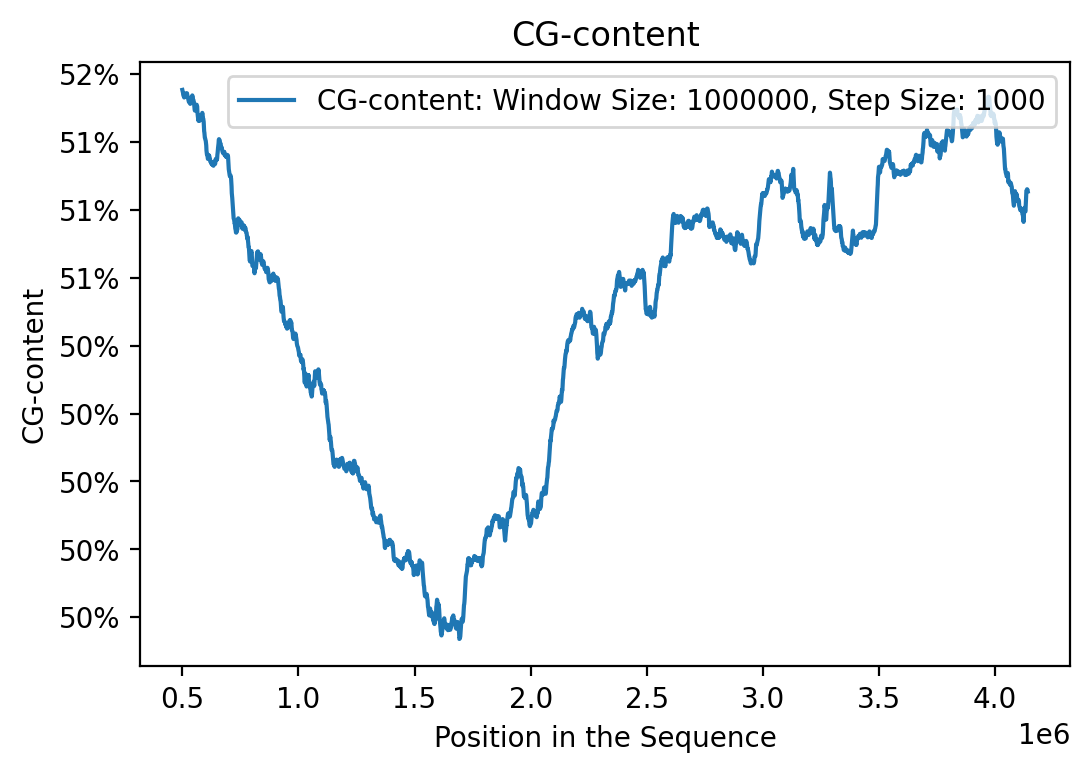

In [11]:
plot_cg_content(parsed.seq, window_size=int(1e6), step_size=int(1e3))